# Loading Packages

In [0]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation
from keras import backend as K
from keras import optimizers
from keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading Dataset

In [0]:
!mkdir -p ~/.kaggle

# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [119]:
!ls

 cell_images				'Data Rotate.npy'   Labels_Blur.npy
 cell-images-for-detecting-malaria.zip	 Data_Rotate.npy    Labels.npy
'Data Blur.npy'				'kaggle (1).json'  'Labels Rotate.npy'
 Data_Blur.npy				 kaggle.json	    Labels_Rotate.npy
 Data.npy				'Labels Blur.npy'   sample_data


In [0]:
!cp kaggle.json ~/.kaggle/
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
sudalairajkumar/novel-corona-virus-2019-dataset             Novel Corona Virus 2019 Dataset                     359KB  2020-03-15 04:49:56          43443  
kimjihoo/coronavirusdataset                                 Coronavirus-Dataset                                  32KB  2020-03-13 13:48:11          14111  
shivamb/real-or-fake-fake-jobposting-prediction             [Real or Fake] Fake JobPosting Prediction            16MB  2020-02-29 08:23:34           1434  
imdevskp/sars-outbreak-2003-complete-dataset                SARS 2003 Outbreak Complete Dataset                  10KB  2020-02-26 10:25:22           1199  
imdevskp/ebola-outbreak-20142016-complete-dataset           Ebol

In [0]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!ls

 98% 660M/675M [00:07<00:00, 94.1MB/s]
100% 675M/675M [00:07<00:00, 90.3MB/s]
cell-images-for-detecting-malaria.zip  kaggle.json  sample_data


In [0]:
!unzip cell-images-for-detecting-malaria.zip
!ls

 cell_images				'kaggle (1).json'   sample_data
 cell-images-for-detecting-malaria.zip	 kaggle.json


# Data Preprocessing

In [0]:
print(os.listdir("./cell_images/cell_images"))

['Uninfected', 'Parasitized']


In [0]:
infected = os.listdir('./cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('./cell_images/cell_images/Uninfected/')

In [0]:
data = []
labels = []
data_rotate = []
labels_rotate = []
data_blur = []
labels_blur = []

for i in infected:
    try:
    
        image = cv2.imread("./cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50)) #image resizing
        rotated120 = resize_img.rotate(120) #rotation
        blur = cv2.blur(np.array(resize_img) ,(10,10)) #bluring
        data.append(np.array(resize_img))
        data_rotate.append(np.array(rotated120))
        data_blur.append(np.array(blur))
        label = to_categorical(1, num_classes=2) 
        labels.append(label)
        label_rotate = to_categorical(1, num_classes=2) 
        labels_rotate.append(label_rotate)
        label_blur = to_categorical(1, num_classes=2) 
        labels_blur.append(label_blur)
        
        
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("./cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50)) #image resizing
        rotated120 = resize_img.rotate(120) #rotation
        blur = cv2.blur(np.array(resize_img) ,(10,10)) #bluring
        data.append(np.array(resize_img))
        data_rotate.append(np.array(rotated120))
        data_blur.append(np.array(blur)) 
        label = to_categorical(0, num_classes=2) 
        labels.append(label)
        label_rotate = to_categorical(0, num_classes=2) 
        labels_rotate.append(label_rotate)
        label_blur = to_categorical(0, num_classes=2) 
        labels_blur.append(label_blur)
        
    except AttributeError:
        print('')

data = np.array(data)
data_rotate = np.array(data_rotate)
data_blur = np.array(data_blur)
labels = np.array(labels)
labels_rotate = np.array(labels_rotate)
labels_blur = np.array(labels_blur)


np.save('Data' , data)
np.save('Labels' , labels)
np.save('Data_Rotate' , data_rotate)
np.save('Labels_Rotate' , labels_rotate)
np.save('Data_Blur' , data_blur)
np.save('Labels_Blur' , labels_blur)

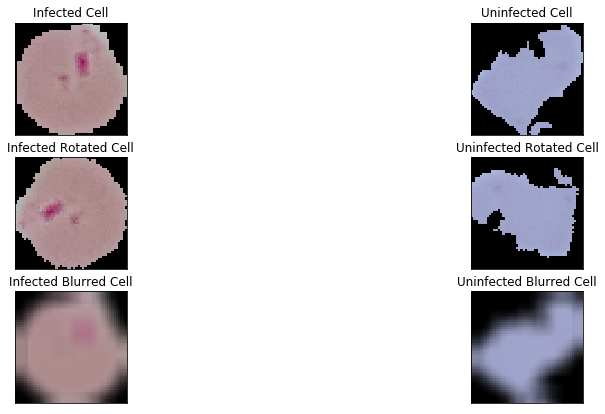

In [0]:
plt.figure(3, figsize = (15 , 7))
plt.subplot(3 , 2 , 1)
plt.imshow(data[10])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 2)
plt.imshow(data[15000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 3)
plt.imshow(data_rotate[10])
plt.title('Infected Rotated Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 4)
plt.imshow(data_rotate[15000])
plt.title('Uninfected Rotated Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 5)
plt.imshow(data_blur[10])
plt.title('Infected Blurred Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 6)
plt.imshow(data_blur[15000])
plt.title('Uninfected Blurred Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [0]:
n = np.arange(data.shape[0]) #shuffle images
np.random.shuffle(n)
data = data[n]
labels = labels[n]

np.random.shuffle(n)
data_rotate = data_rotate[n]
labels_rotate = labels_rotate[n]

np.random.shuffle(n)
data_blur = data_blur[n]
labels_blur = labels_blur[n]

In [0]:
data = data.astype(np.float32)
labels = labels.astype(np.int32)
data = data/255 #reduce weight

data_rotate = data_rotate.astype(np.float32)
labels_rotate = labels_rotate.astype(np.int32)
data_rotate = data_rotate/255

data_blur = data_blur.astype(np.float32)
labels_blur = labels_blur.astype(np.int32)
data_blur = data_blur/255 

In [0]:
print('Cells : {} | Labels : {}'.format(data.shape , labels.shape))

Cells : (27558, 50, 50, 3) | Labels : (27558, 2)


**Train Test Split**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
x_train_rotate, x_test_rotate, y_train_rotate, y_test_rotate = train_test_split(data_rotate, labels_rotate, test_size=0.2, random_state=0)
x_train_blur, x_test_blur, y_train_blur, y_test_blur = train_test_split(data_blur, labels_blur, test_size=0.2, random_state=0)

In [0]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


# CNN Model

**Building CNN Layers**

In [0]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [0]:
model = CNNbuild(height = 50, width = 50, classes = 2, channels = 3)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_______________________________________

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

# Model Implementation and Evaluation

**Unaltered Data**

In [0]:
fitting = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Train on 22046 samples
22046/22046 [==============================] - 106s 5ms/sample - loss: 0.1702 - acc: 0.9423


In [0]:
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 7s 1ms/sample - loss: 0.1509 - acc: 0.9512


In [0]:
pred_label = model.predict(x_test)

In [0]:
pred_label = np.argmax(pred_label, axis=-1)
true_label = np.argmax(y_test, axis = -1)

print(pred_label)
print(true_label)

[1 1 1 ... 1 1 0]
[1 1 1 ... 0 1 0]


In [0]:
print(classification_report(true_label , pred_label))
print(f'Loss : {predictions[0]}')
print(f'Accuracy : {predictions[1]}')

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2744
           1       0.98      0.93      0.95      2768

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512

Loss : 0.1509205354066736
Accuracy : 0.9511973857879639


<Figure size 432x288 with 0 Axes>

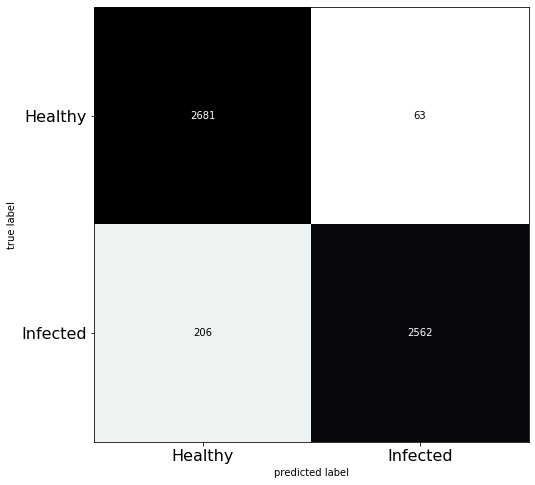

In [0]:
conf_matrix=confusion_matrix(true_label , pred_label)
plt.figure()
plot_confusion_matrix(conf_matrix, figsize=(12,8), hide_ticks=True, cmap=plt.cm.bone_r)
plt.xticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.yticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.show()

**Rotated Data**

In [0]:
fitting_rotate = model.fit(x_train_rotate, y_train_rotate, epochs = 20, batch_size = 32)

In [0]:
predictions_rotate = model.evaluate(x_test_rotate, y_test_rotate)

In [0]:
pred_label_rotate = model.predict(x_test_rotate)

In [0]:
pred_label_rotate = np.argmax(pred_label_rotate, axis=-1)
true_label_rotate = np.argmax(y_test_rotate, axis = -1)

print(pred_label_rotate)
print(true_label_rotate)

In [0]:
print(classification_report(true_label_rotate , pred_label_rotate))
print(f'Loss : {predictions_rotate[0]}')
print(f'Accuracy : {predictions_rotate[1]}')

In [0]:
conf_matrix_rotate=confusion_matrix(true_label_rotate , pred_label_rotate)
plt.figure()
plot_confusion_matrix(conf_matrix_rotate, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.yticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.show()

**Blurred Data**

In [0]:
fitting_blur = model.fit(x_train_blur, y_train_blur, epochs = 20, batch_size = 32)

In [0]:
predictions_blur = model.evaluate(x_test_blur , y_test_blur)

In [0]:
pred_label_blur = model.predict(x_test_blur)

In [0]:
pred_label_blur = np.argmax(pred_label_blur, axis=-1)
true_label_blur = np.argmax(y_test_blur, axis = -1)

print(pred_label_blur)
print(true_label_blur)

In [0]:
print(classification_report(true_label_blur , pred_label_blur))
print(f'Loss : {predictions_blur[0]}')
print(f'Accuracy : {predictions_blur[1]}')

In [0]:
conf_matrix_blur=confusion_matrix(true_label_blur , pred_label_blur)
plt.figure()
plot_confusion_matrix(conf_matrix_blur, figsize=(12,8), hide_ticks=True, cmap=plt.cm.jet)
plt.xticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.yticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.show()